In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn

get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file 
uf = pd.read_csv(r'C:\Users\Home\Downloads\H2HBABBA2938.csv')
uf.shape

(50000, 19)

In [3]:
# checkng n rows of the file
uf.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104423,METRO trust,NaN,2020.0,2.960626e+09,2020-04-06,20200406,20200406,20200418.0,CAD,RV,1.0,NaN,76344.09,20200408.0,CA10,2.960626e+09,1
1,U001,0200726979,BJ'S associates,2019-08-05 00:00:00,2019.0,1.929634e+09,2019-07-19,20190718,20190719,20190803.0,USD,RV,1.0,NaN,59.16,20190719.0,NAA8,1.929634e+09,0
2,U013,CC6050,HEIN,2019-09-24 00:00:00,2019.0,1.991831e+09,2019-08-21,20190821,20190821,20191005.0,USD,RV,1.0,NaN,5619.34,20190821.0,NAVF,1.991831e+09,0
3,U001,0200769623,WAL-MAR associates,2019-12-30 00:00:00,2019.0,1.930268e+09,2019-12-13,20191211,20191213,20191228.0,USD,RV,1.0,NaN,587.93,20191213.0,NAH4,1.930268e+09,0
4,U001,0200978899,MBM/PF co,2019-10-24 00:00:00,2019.0,1.929982e+09,2019-10-08,20191008,20191008,20191023.0,USD,RV,1.0,NaN,50648.98,20191008.0,NAA8,1.929982e+09,0


# Preprocessing

In [4]:
# date time conversion
uf['clear_date']=pd.to_datetime(uf['clear_date'])
uf['document_create_date']=pd.to_datetime(uf['document_create_date'],format='%Y%m%d')
uf['document_create_date.1']=pd.to_datetime(uf['document_create_date.1'], format='%Y%m%d')
uf['due_in_date']=pd.to_datetime(uf['due_in_date'],format='%Y%m%d')
uf['baseline_create_date']=pd.to_datetime(uf['baseline_create_date'],format='%Y%m%d')
uf['posting_date']=pd.to_datetime(uf['posting_date'])

In [5]:
# checking data types
uf.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [6]:
# Adding delay column
Delay= (uf['clear_date']- uf['due_in_date']).dt.days
uf['Delay'] = Delay
uf

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,CA02,0140104423,METRO trust,NaT,2020.0,2.960626e+09,2020-04-06,2020-04-06,2020-04-06,2020-04-18,CAD,RV,1.0,NaN,76344.09,2020-04-08,CA10,2.960626e+09,1,NaN
1,U001,0200726979,BJ'S associates,2019-08-05,2019.0,1.929634e+09,2019-07-19,2019-07-18,2019-07-19,2019-08-03,USD,RV,1.0,NaN,59.16,2019-07-19,NAA8,1.929634e+09,0,2.0
2,U013,CC6050,HEIN,2019-09-24,2019.0,1.991831e+09,2019-08-21,2019-08-21,2019-08-21,2019-10-05,USD,RV,1.0,NaN,5619.34,2019-08-21,NAVF,1.991831e+09,0,-11.0
3,U001,0200769623,WAL-MAR associates,2019-12-30,2019.0,1.930268e+09,2019-12-13,2019-12-11,2019-12-13,2019-12-28,USD,RV,1.0,NaN,587.93,2019-12-13,NAH4,1.930268e+09,0,2.0
4,U001,0200978899,MBM/PF co,2019-10-24,2019.0,1.929982e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,NaN,50648.98,2019-10-08,NAA8,1.929982e+09,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200803720,DEC in,2020-01-09,2020.0,1.930366e+09,2020-01-07,2020-01-07,2020-01-07,2020-01-11,USD,RV,1.0,NaN,7820.80,2020-01-01,NAM2,1.930366e+09,0,-2.0
49996,U001,0200769623,WAL-MAR systems,2019-10-24,2019.0,1.930007e+09,2019-10-14,2019-10-12,2019-10-14,2019-10-29,USD,RV,1.0,NaN,25443.13,2019-10-14,NAH4,1.930007e+09,0,-5.0
49997,U001,0200793568,SUPE,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,21353.21,2020-03-11,NAA8,1.930638e+09,1,NaN
49998,CA02,0140106408,WAL-M corp,2019-11-04,2019.0,2.960585e+09,2019-10-09,2019-10-09,2019-10-09,2019-10-20,CAD,RV,1.0,NaN,15399.43,2019-10-10,CA10,2.960585e+09,0,15.0


In [7]:
# checking for duplication
uf.duplicated().sum()

1167

In [8]:
#dropping duplicates
uf=uf.drop_duplicates(keep='first')

In [9]:
uf.duplicated().sum()

0

In [10]:
#checking the null values of the columns
uf.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 9713
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             48833
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
Delay                      9713
dtype: int64

In [11]:
# dropping the area business column
uf.drop(columns=['area_business'],inplace=True)

In [12]:
uf.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,CA02,0140104423,METRO trust,NaT,2020.0,2.960626e+09,2020-04-06,2020-04-06,2020-04-06,2020-04-18,CAD,RV,1.0,76344.09,2020-04-08,CA10,2.960626e+09,1,NaN
1,U001,0200726979,BJ'S associates,2019-08-05,2019.0,1.929634e+09,2019-07-19,2019-07-18,2019-07-19,2019-08-03,USD,RV,1.0,59.16,2019-07-19,NAA8,1.929634e+09,0,2.0
2,U013,CC6050,HEIN,2019-09-24,2019.0,1.991831e+09,2019-08-21,2019-08-21,2019-08-21,2019-10-05,USD,RV,1.0,5619.34,2019-08-21,NAVF,1.991831e+09,0,-11.0
3,U001,0200769623,WAL-MAR associates,2019-12-30,2019.0,1.930268e+09,2019-12-13,2019-12-11,2019-12-13,2019-12-28,USD,RV,1.0,587.93,2019-12-13,NAH4,1.930268e+09,0,2.0
4,U001,0200978899,MBM/PF co,2019-10-24,2019.0,1.929982e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,50648.98,2019-10-08,NAA8,1.929982e+09,0,1.0


In [13]:
uf.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9713
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   4
isOpen                       0
Delay                     9713
dtype: int64

In [14]:
# dropping the invoice id null rows
uf=uf[uf['invoice_id'].notna()]

In [15]:
uf.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9713
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
Delay                     9713
dtype: int64

## Removing the data points where target value is null

### Delay is target column

In [16]:
main_train = uf[uf.Delay.isnull()==False]
main_test = uf[uf.Delay.isnull()]

In [17]:
main_train.shape

(39116, 19)

In [18]:
# null values have been removed
main_train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
Delay                     0
dtype: int64

In [19]:
# checking the column alog with the data type
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 1 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39116 non-null  object        
 1   cust_number             39116 non-null  object        
 2   name_customer           39116 non-null  object        
 3   clear_date              39116 non-null  datetime64[ns]
 4   buisness_year           39116 non-null  float64       
 5   doc_id                  39116 non-null  float64       
 6   posting_date            39116 non-null  datetime64[ns]
 7   document_create_date    39116 non-null  datetime64[ns]
 8   document_create_date.1  39116 non-null  datetime64[ns]
 9   due_in_date             39116 non-null  datetime64[ns]
 10  invoice_currency        39116 non-null  object        
 11  document type           39116 non-null  object        
 12  posting_id              39116 non-null  float6

In [20]:
# Way to check for variance -> nunique
main_train.nunique()

business_code                 6
cust_number                1323
name_customer              3921
clear_date                  407
buisness_year                 2
doc_id                    39116
posting_date                423
document_create_date        428
document_create_date.1      423
due_in_date                 489
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35563
baseline_create_date        428
cust_payment_terms           68
invoice_id                39116
isOpen                        1
Delay                       170
dtype: int64

In [21]:
# For catagorical columns with relatively low unique value (<= 7)
# if unique count ==1 , constant column 
for col in main_train.columns:
    if main_train[col].nunique()<= 7:
        print(main_train[col].value_counts())
        print('#########################')

U001    35388
CA02     3089
U013      517
U002      108
U005       13
U007        1
Name: business_code, dtype: int64
#########################
2019.0    33858
2020.0     5258
Name: buisness_year, dtype: int64
#########################
USD    36026
CAD     3090
Name: invoice_currency, dtype: int64
#########################
RV    39116
Name: document type, dtype: int64
#########################
1.0    39116
Name: posting_id, dtype: int64
#########################
0    39116
Name: isOpen, dtype: int64
#########################


# Splitting Data

In [22]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X -> contains the dataframe without the target i.e Delay
X = main_train.drop('Delay',axis=1)

# y -> contains only the target value
y = main_train['Delay']

In [23]:
# splitting the data first into 2 part :- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [24]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [25]:
X_train.shape , X_val.shape , X_test.shape

((27381, 18), (5867, 18), (5868, 18))

# EDA

<AxesSubplot:xlabel='Delay', ylabel='Density'>

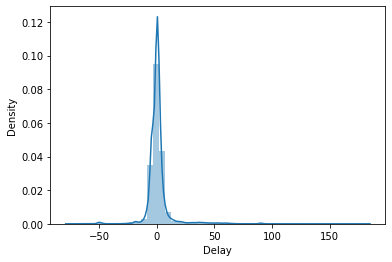

In [26]:
sns.distplot(y_train)

# Feature Engineering

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27381 non-null  object        
 1   cust_number             27381 non-null  object        
 2   name_customer           27381 non-null  object        
 3   clear_date              27381 non-null  datetime64[ns]
 4   buisness_year           27381 non-null  float64       
 5   doc_id                  27381 non-null  float64       
 6   posting_date            27381 non-null  datetime64[ns]
 7   document_create_date    27381 non-null  datetime64[ns]
 8   document_create_date.1  27381 non-null  datetime64[ns]
 9   due_in_date             27381 non-null  datetime64[ns]
 10  invoice_currency        27381 non-null  object        
 11  document type           27381 non-null  object        
 12  posting_id              27381 non-null  float6

In [28]:
# This will encode the business code value into new column business_code_inc
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])

In [29]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
1,1,U001
2,5,U013
3,1,U001
4,1,U001
5,1,U001
...,...,...
34766,1,U001
34767,1,U001
34769,1,U001
34770,1,U001


In [30]:
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [31]:
X_test[['business_code_enc','business_code']]

,business_code_enc,business_code
42345,1,U001
42346,1,U001
42347,1,U001
42348,1,U001
42349,1,U001
...,...,...
49994,1,U001
49995,1,U001
49996,1,U001
49998,0,CA02


In [32]:
# This will delete a business code column from train,val and test
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             27381 non-null  object        
 1   name_customer           27381 non-null  object        
 2   clear_date              27381 non-null  datetime64[ns]
 3   buisness_year           27381 non-null  float64       
 4   doc_id                  27381 non-null  float64       
 5   posting_date            27381 non-null  datetime64[ns]
 6   document_create_date    27381 non-null  datetime64[ns]
 7   document_create_date.1  27381 non-null  datetime64[ns]
 8   due_in_date             27381 non-null  datetime64[ns]
 9   invoice_currency        27381 non-null  object        
 10  document type           27381 non-null  object        
 11  posting_id              27381 non-null  float64       
 12  total_open_amount       27381 non-null  float6

In [34]:
# Function to delete a particular column from train,val and test
def drop_data(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [35]:
# Extracting day,month and year of clear_date

X_train['dayof_clear_date'] = X_train['clear_date'].dt.day
X_train['monthof_clear_date'] = X_train['clear_date'].dt.month
X_train['yearof_clear_date'] = X_train['clear_date'].dt.year

X_val['dayof_clear_date'] = X_val['clear_date'].dt.day
X_val['monthof_clear_date'] = X_val['clear_date'].dt.month
X_val['yearof_clear_date'] = X_val['clear_date'].dt.year


X_test['dayof_clear_date'] = X_test['clear_date'].dt.day
X_test['monthof_clear_date'] = X_test['clear_date'].dt.month
X_test['yearof_clear_date'] = X_test['clear_date'].dt.year

In [36]:
# calling a function to delete the clear_date column from train,val and test
X_train ,X_val, X_test = drop_data(['clear_date'])

In [37]:
# checking if clear_date have converted to date,month and year
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             27381 non-null  object        
 1   name_customer           27381 non-null  object        
 2   buisness_year           27381 non-null  float64       
 3   doc_id                  27381 non-null  float64       
 4   posting_date            27381 non-null  datetime64[ns]
 5   document_create_date    27381 non-null  datetime64[ns]
 6   document_create_date.1  27381 non-null  datetime64[ns]
 7   due_in_date             27381 non-null  datetime64[ns]
 8   invoice_currency        27381 non-null  object        
 9   document type           27381 non-null  object        
 10  posting_id              27381 non-null  float64       
 11  total_open_amount       27381 non-null  float64       
 12  baseline_create_date    27381 non-null  dateti

In [38]:
X_train['dayof_posting_date'] = X_train['posting_date'].dt.day
X_train['monthof_posting_date'] = X_train['posting_date'].dt.month
X_train['yearof_posting_date'] = X_train['posting_date'].dt.year

X_val['dayof_posting_date'] = X_val['posting_date'].dt.day
X_val['monthof_posting_date'] = X_val['posting_date'].dt.month
X_val['yearof_posting_date'] = X_val['posting_date'].dt.year


X_test['dayof_posting_date'] = X_test['posting_date'].dt.day
X_test['monthof_posting_date'] = X_test['posting_date'].dt.month
X_test['yearof_posting_date'] = X_test['posting_date'].dt.year

In [39]:
X_train ,X_val, X_test = drop_data(['posting_date'])

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             27381 non-null  object        
 1   name_customer           27381 non-null  object        
 2   buisness_year           27381 non-null  float64       
 3   doc_id                  27381 non-null  float64       
 4   document_create_date    27381 non-null  datetime64[ns]
 5   document_create_date.1  27381 non-null  datetime64[ns]
 6   due_in_date             27381 non-null  datetime64[ns]
 7   invoice_currency        27381 non-null  object        
 8   document type           27381 non-null  object        
 9   posting_id              27381 non-null  float64       
 10  total_open_amount       27381 non-null  float64       
 11  baseline_create_date    27381 non-null  datetime64[ns]
 12  cust_payment_terms      27381 non-null  object

In [41]:
X_train['dayof_due_in_date'] = X_train['due_in_date'].dt.day
X_train['monthof_due_in_date'] = X_train['due_in_date'].dt.month
X_train['yearof_due_in_date'] = X_train['due_in_date'].dt.year

X_val['dayof_due_in_date'] = X_val['due_in_date'].dt.day
X_val['monthof_due_in_date'] = X_val['due_in_date'].dt.month
X_val['yearof_due_in_date'] = X_val['due_in_date'].dt.year


X_test['dayof_due_in_date'] = X_test['due_in_date'].dt.day
X_test['monthof_due_in_date'] = X_test['due_in_date'].dt.month
X_test['yearof_due_in_date'] = X_test['due_in_date'].dt.year

In [42]:
X_train ,X_val, X_test = drop_data(['due_in_date'])

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             27381 non-null  object        
 1   name_customer           27381 non-null  object        
 2   buisness_year           27381 non-null  float64       
 3   doc_id                  27381 non-null  float64       
 4   document_create_date    27381 non-null  datetime64[ns]
 5   document_create_date.1  27381 non-null  datetime64[ns]
 6   invoice_currency        27381 non-null  object        
 7   document type           27381 non-null  object        
 8   posting_id              27381 non-null  float64       
 9   total_open_amount       27381 non-null  float64       
 10  baseline_create_date    27381 non-null  datetime64[ns]
 11  cust_payment_terms      27381 non-null  object        
 12  invoice_id              27381 non-null  float6

In [44]:
# repeating the prev process, this time for baseline_create_date
X_train['dayof_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['monthof_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['yearof_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['dayof_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['monthof_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['yearof_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['dayof_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['monthof_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['yearof_baseline_create_date'] = X_test['baseline_create_date'].dt.year

In [45]:
X_train ,X_val, X_test = drop_data(['baseline_create_date'])

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   cust_number                   27381 non-null  object        
 1   name_customer                 27381 non-null  object        
 2   buisness_year                 27381 non-null  float64       
 3   doc_id                        27381 non-null  float64       
 4   document_create_date          27381 non-null  datetime64[ns]
 5   document_create_date.1        27381 non-null  datetime64[ns]
 6   invoice_currency              27381 non-null  object        
 7   document type                 27381 non-null  object        
 8   posting_id                    27381 non-null  float64       
 9   total_open_amount             27381 non-null  float64       
 10  cust_payment_terms            27381 non-null  object        
 11  invoice_id                  

In [47]:
X_train['dayof_document_create_date'] = X_train['document_create_date'].dt.day
X_train['monthof_document_create_date'] = X_train['document_create_date'].dt.month
X_train['yearof_document_create_date'] = X_train['document_create_date'].dt.year

X_val['dayof_document_create_date'] = X_val['document_create_date'].dt.day
X_val['monthof_document_create_date'] = X_val['document_create_date'].dt.month
X_val['yearof_document_create_date'] = X_val['document_create_date'].dt.year


X_test['dayof_document_create_date'] = X_test['document_create_date'].dt.day
X_test['monthof_document_create_date'] = X_test['document_create_date'].dt.month
X_test['yearof_document_create_date'] = X_test['document_create_date'].dt.year

In [48]:
X_train ,X_val, X_test = drop_data(['document_create_date'])

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   cust_number                   27381 non-null  object        
 1   name_customer                 27381 non-null  object        
 2   buisness_year                 27381 non-null  float64       
 3   doc_id                        27381 non-null  float64       
 4   document_create_date.1        27381 non-null  datetime64[ns]
 5   invoice_currency              27381 non-null  object        
 6   document type                 27381 non-null  object        
 7   posting_id                    27381 non-null  float64       
 8   total_open_amount             27381 non-null  float64       
 9   cust_payment_terms            27381 non-null  object        
 10  invoice_id                    27381 non-null  float64       
 11  isOpen                      

In [50]:
X_train['dayof_document_create_date.1'] = X_train['document_create_date.1'].dt.day
X_train['monthof_document_create_date.1'] = X_train['document_create_date.1'].dt.month
X_train['yearof_document_create_date.1'] = X_train['document_create_date.1'].dt.year

X_val['dayof_document_create_date.1'] = X_val['document_create_date.1'].dt.day
X_val['monthof_document_create_date.1'] = X_val['document_create_date.1'].dt.month
X_val['yearof_document_create_date.1'] = X_val['document_create_date.1'].dt.year


X_test['dayof_document_create_date.1'] = X_test['document_create_date.1'].dt.day
X_test['monthof_document_create_date.1'] = X_test['document_create_date.1'].dt.month
X_test['yearof_document_create_date.1'] = X_test['document_create_date.1'].dt.year

In [51]:
X_train ,X_val, X_test = drop_data(['document_create_date.1'])

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     27381 non-null  object 
 1   name_customer                   27381 non-null  object 
 2   buisness_year                   27381 non-null  float64
 3   doc_id                          27381 non-null  float64
 4   invoice_currency                27381 non-null  object 
 5   document type                   27381 non-null  object 
 6   posting_id                      27381 non-null  float64
 7   total_open_amount               27381 non-null  float64
 8   cust_payment_terms              27381 non-null  object 
 9   invoice_id                      27381 non-null  float64
 10  isOpen                          27381 non-null  int64  
 11  business_code_enc               27381 non-null  int32  
 12  dayof_clear_date                

In [53]:
# converting invoice_currency to float by replacing USD to 1 and CAD to 0.81
X_train['invoice_currency'] = X_train['invoice_currency'].str.replace('USD',"1").str.replace('CAD',"0.81").astype(float)
X_val['invoice_currency'] = X_val['invoice_currency'].str.replace('USD',"1").str.replace('CAD',"0.81").astype(float)
X_test['invoice_currency'] = X_test['invoice_currency'].str.replace('USD',"1").str.replace('CAD',"0.81").astype(float)

In [54]:
# dropping the invoice_currency
X_train ,X_val, X_test = drop_data(['invoice_currency'])

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     27381 non-null  object 
 1   name_customer                   27381 non-null  object 
 2   buisness_year                   27381 non-null  float64
 3   doc_id                          27381 non-null  float64
 4   document type                   27381 non-null  object 
 5   posting_id                      27381 non-null  float64
 6   total_open_amount               27381 non-null  float64
 7   cust_payment_terms              27381 non-null  object 
 8   invoice_id                      27381 non-null  float64
 9   isOpen                          27381 non-null  int64  
 10  business_code_enc               27381 non-null  int32  
 11  dayof_clear_date                27381 non-null  int64  
 12  monthof_clear_date              

In [56]:
# converting document_type to int data type by replacing RV to 1
X_train['document type'] = X_train['document type'].str.replace('RV',"1").astype(int)
X_val['document type'] = X_val['document type'].str.replace('RV',"1").astype(int)
X_test['document type'] = X_test['document type'].str.replace('RV',"1").astype(int)

In [57]:
# dropping the document type
X_train ,X_val, X_test = drop_data(['document type'])

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     27381 non-null  object 
 1   name_customer                   27381 non-null  object 
 2   buisness_year                   27381 non-null  float64
 3   doc_id                          27381 non-null  float64
 4   posting_id                      27381 non-null  float64
 5   total_open_amount               27381 non-null  float64
 6   cust_payment_terms              27381 non-null  object 
 7   invoice_id                      27381 non-null  float64
 8   isOpen                          27381 non-null  int64  
 9   business_code_enc               27381 non-null  int32  
 10  dayof_clear_date                27381 non-null  int64  
 11  monthof_clear_date              27381 non-null  int64  
 12  yearof_clear_date               

In [59]:
X_train['cust_payment_terms'] = X_train['cust_payment_terms'].str.split(" ")
X_val['cust_payment_terms'] = X_val['cust_payment_terms'].str.split(" ")
X_test['cust_payment_terms'] = X_test['cust_payment_terms'].str.split(" ")

In [60]:
X_train ,X_val, X_test = drop_data(['cust_payment_terms'])

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     27381 non-null  object 
 1   name_customer                   27381 non-null  object 
 2   buisness_year                   27381 non-null  float64
 3   doc_id                          27381 non-null  float64
 4   posting_id                      27381 non-null  float64
 5   total_open_amount               27381 non-null  float64
 6   invoice_id                      27381 non-null  float64
 7   isOpen                          27381 non-null  int64  
 8   business_code_enc               27381 non-null  int32  
 9   dayof_clear_date                27381 non-null  int64  
 10  monthof_clear_date              27381 non-null  int64  
 11  yearof_clear_date               27381 non-null  int64  
 12  dayof_posting_date              

In [62]:
# Label encoding for customer number
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

X_train['cust_number']=label_encoder.fit_transform(X_train['cust_number'])
X_test['cust_number']=label_encoder.fit_transform(X_test['cust_number'])
X_val['cust_number']=label_encoder.fit_transform(X_val['cust_number'])

In [63]:
X_train

,cust_number,name_customer,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,business_code_enc,dayof_clear_date,...,yearof_due_in_date,dayof_baseline_create_date,monthof_baseline_create_date,yearof_baseline_create_date,dayof_document_create_date,monthof_document_create_date,yearof_document_create_date,dayof_document_create_date.1,monthof_document_create_date.1,yearof_document_create_date.1
1,636,BJ'S associates,2019.0,1.929634e+09,1.0,59.16,1.929634e+09,0,1,5,...,2019,19,7,2019,18,7,2019,19,7,2019
2,1145,HEIN,2019.0,1.991831e+09,1.0,5619.34,1.991831e+09,0,5,24,...,2019,21,8,2019,21,8,2019,21,8,2019
3,728,WAL-MAR associates,2019.0,1.930268e+09,1.0,587.93,1.930268e+09,0,1,30,...,2019,13,12,2019,11,12,2019,13,12,2019
4,872,MBM/PF co,2019.0,1.929982e+09,1.0,50648.98,1.929982e+09,0,1,24,...,2019,8,10,2019,8,10,2019,8,10,2019
5,640,KROGER associates,2019.0,1.928579e+09,1.0,103444.06,1.928579e+09,0,1,23,...,2019,6,1,2019,5,1,2019,6,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34766,728,WAL-MAR systems,2019.0,1.929876e+09,1.0,14978.83,1.929876e+09,0,1,25,...,2019,15,9,2019,14,9,2019,15,9,2019
34767,769,FAREW us,2019.0,1.930139e+09,1.0,86795.69,1.930139e+09,0,1,26,...,2019,12,11,2019,11,11,2019,12,11,2019
34769,362,DEC us,2019.0,1.929708e+09,1.0,1809.63,1.929708e+09,0,1,16,...,2019,1,8,2019,6,8,2019,6,8,2019
34770,728,WAL-MAR co,2019.0,1.928756e+09,1.0,59837.87,1.928756e+09,0,1,25,...,2019,7,2,2019,6,2,2019,7,2,2019


In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     27381 non-null  int32  
 1   name_customer                   27381 non-null  object 
 2   buisness_year                   27381 non-null  float64
 3   doc_id                          27381 non-null  float64
 4   posting_id                      27381 non-null  float64
 5   total_open_amount               27381 non-null  float64
 6   invoice_id                      27381 non-null  float64
 7   isOpen                          27381 non-null  int64  
 8   business_code_enc               27381 non-null  int32  
 9   dayof_clear_date                27381 non-null  int64  
 10  monthof_clear_date              27381 non-null  int64  
 11  yearof_clear_date               27381 non-null  int64  
 12  dayof_posting_date              

In [65]:
# Label encoding for customer name
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

X_train['name_customer']=label_encoder.fit_transform(X_train['name_customer'])
X_test['name_customer']=label_encoder.fit_transform(X_test['name_customer'])
X_val['name_customer']=label_encoder.fit_transform(X_val['name_customer'])

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     27381 non-null  int32  
 1   name_customer                   27381 non-null  int32  
 2   buisness_year                   27381 non-null  float64
 3   doc_id                          27381 non-null  float64
 4   posting_id                      27381 non-null  float64
 5   total_open_amount               27381 non-null  float64
 6   invoice_id                      27381 non-null  float64
 7   isOpen                          27381 non-null  int64  
 8   business_code_enc               27381 non-null  int32  
 9   dayof_clear_date                27381 non-null  int64  
 10  monthof_clear_date              27381 non-null  int64  
 11  yearof_clear_date               27381 non-null  int64  
 12  dayof_posting_date              

In [67]:
X_train

,cust_number,name_customer,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,business_code_enc,dayof_clear_date,...,yearof_due_in_date,dayof_baseline_create_date,monthof_baseline_create_date,yearof_baseline_create_date,dayof_document_create_date,monthof_document_create_date,yearof_document_create_date,dayof_document_create_date.1,monthof_document_create_date.1,yearof_document_create_date.1
1,636,345,2019.0,1.929634e+09,1.0,59.16,1.929634e+09,0,1,5,...,2019,19,7,2019,18,7,2019,19,7,2019
2,1145,1299,2019.0,1.991831e+09,1.0,5619.34,1.991831e+09,0,5,24,...,2019,21,8,2019,21,8,2019,21,8,2019
3,728,3187,2019.0,1.930268e+09,1.0,587.93,1.930268e+09,0,1,30,...,2019,13,12,2019,11,12,2019,13,12,2019
4,872,1906,2019.0,1.929982e+09,1.0,50648.98,1.929982e+09,0,1,24,...,2019,8,10,2019,8,10,2019,8,10,2019
5,640,1683,2019.0,1.928579e+09,1.0,103444.06,1.928579e+09,0,1,23,...,2019,6,1,2019,5,1,2019,6,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34766,728,3194,2019.0,1.929876e+09,1.0,14978.83,1.929876e+09,0,1,25,...,2019,15,9,2019,14,9,2019,15,9,2019
34767,769,963,2019.0,1.930139e+09,1.0,86795.69,1.930139e+09,0,1,26,...,2019,12,11,2019,11,11,2019,12,11,2019
34769,362,753,2019.0,1.929708e+09,1.0,1809.63,1.929708e+09,0,1,16,...,2019,1,8,2019,6,8,2019,6,8,2019
34770,728,3188,2019.0,1.928756e+09,1.0,59837.87,1.928756e+09,0,1,25,...,2019,7,2,2019,6,2,2019,7,2,2019


# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

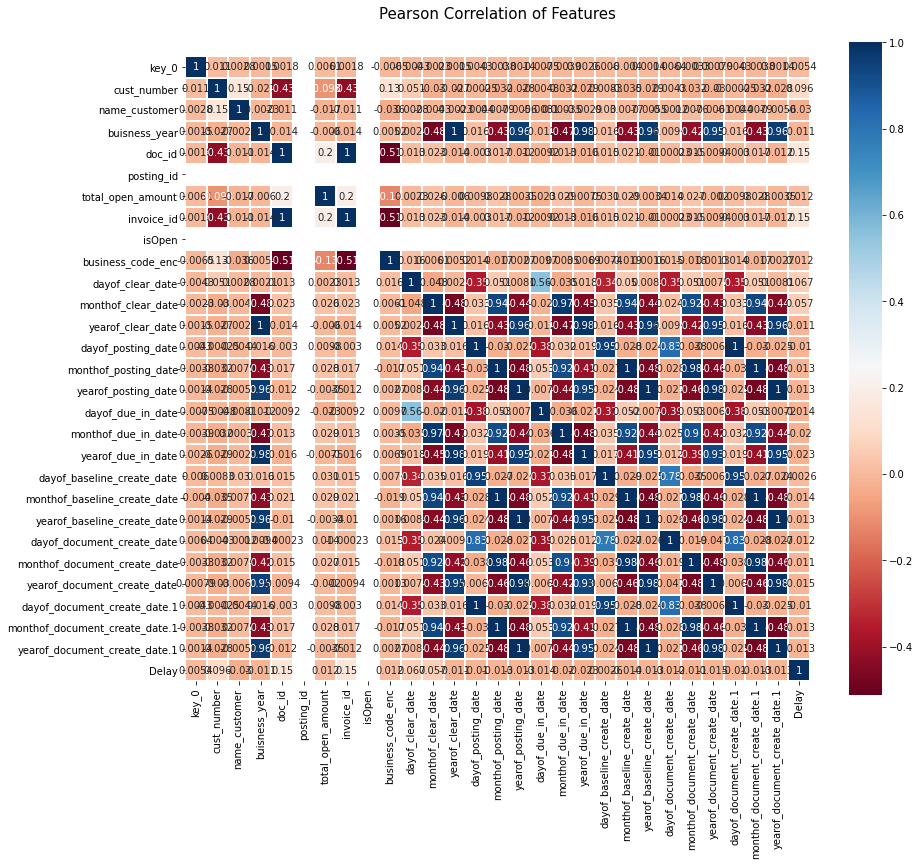

In [68]:
# checking the correlation of features
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [69]:
# here from above posting_id and isOpen is a constant column hence should be dropped

In [70]:
X_train ,X_val, X_test = drop_data(['posting_id'])

In [71]:
X_train ,X_val, X_test = drop_data(['isOpen'])

In [72]:
# doc_id is same as invoice_id so it has been dropped
# Also day,month and year of baseline_create_date is same as day,month and year of document_create_date so it has been dropped

In [73]:
X_train ,X_val, X_test = drop_data(['doc_id'])

In [74]:
X_train ,X_val, X_test = drop_data(['dayof_document_create_date.1'])
X_train ,X_val, X_test = drop_data(['monthof_document_create_date.1'])
X_train ,X_val, X_test = drop_data(['yearof_document_create_date.1'])

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cust_number                   27381 non-null  int32  
 1   name_customer                 27381 non-null  int32  
 2   buisness_year                 27381 non-null  float64
 3   total_open_amount             27381 non-null  float64
 4   invoice_id                    27381 non-null  float64
 5   business_code_enc             27381 non-null  int32  
 6   dayof_clear_date              27381 non-null  int64  
 7   monthof_clear_date            27381 non-null  int64  
 8   yearof_clear_date             27381 non-null  int64  
 9   dayof_posting_date            27381 non-null  int64  
 10  monthof_posting_date          27381 non-null  int64  
 11  yearof_posting_date           27381 non-null  int64  
 12  dayof_due_in_date             27381 non-null  int64  
 13  m

In [76]:
# dropping beacuse it is also same
X_train ,X_val, X_test = drop_data(['yearof_clear_date'])
X_train ,X_val, X_test = drop_data(['yearof_posting_date'])

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cust_number                   27381 non-null  int32  
 1   name_customer                 27381 non-null  int32  
 2   buisness_year                 27381 non-null  float64
 3   total_open_amount             27381 non-null  float64
 4   invoice_id                    27381 non-null  float64
 5   business_code_enc             27381 non-null  int32  
 6   dayof_clear_date              27381 non-null  int64  
 7   monthof_clear_date            27381 non-null  int64  
 8   dayof_posting_date            27381 non-null  int64  
 9   monthof_posting_date          27381 non-null  int64  
 10  dayof_due_in_date             27381 non-null  int64  
 11  monthof_due_in_date           27381 non-null  int64  
 12  yearof_due_in_date            27381 non-null  int64  
 13  d

In [78]:
X_train ,X_val, X_test = drop_data(['name_customer'])

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cust_number                   27381 non-null  int32  
 1   buisness_year                 27381 non-null  float64
 2   total_open_amount             27381 non-null  float64
 3   invoice_id                    27381 non-null  float64
 4   business_code_enc             27381 non-null  int32  
 5   dayof_clear_date              27381 non-null  int64  
 6   monthof_clear_date            27381 non-null  int64  
 7   dayof_posting_date            27381 non-null  int64  
 8   monthof_posting_date          27381 non-null  int64  
 9   dayof_due_in_date             27381 non-null  int64  
 10  monthof_due_in_date           27381 non-null  int64  
 11  yearof_due_in_date            27381 non-null  int64  
 12  dayof_baseline_create_date    27381 non-null  int64  
 13  m

In [80]:
# converting to int type as delay is in float
y_train.astype(int)

1         2
2       -11
3         2
4         1
5         2
         ..
34766    -5
34767    -1
34769    -8
34770     3
34771     6
Name: Delay, Length: 27381, dtype: int32

In [81]:
y_test.astype(int)

42345    -5
42346     1
42347    -8
42348     4
42349    -2
         ..
49994     2
49995    -2
49996    -5
49998    15
49999     5
Name: Delay, Length: 5868, dtype: int32

In [82]:
y_val.astype(int)

34772   -3
34773    1
34774   -2
34775    4
34776   -1
        ..
42339    3
42340   -4
42342    3
42343    2
42344   -3
Name: Delay, Length: 5867, dtype: int32

# Modelling
## Linear regression

In [83]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression(fit_intercept=True)
base_model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_predict = base_model.predict(X_val)

In [85]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

0.3179912728088528

In [86]:
base_model_accuracy=round(base_model.score(X_train,y_train)*100,2)
print(round(base_model_accuracy,2),'%')

99.92 %


## Decision tree regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=5 , max_depth=100)

In [88]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100, random_state=5)

In [89]:
y_predict2 = regressor.predict(X_val)

In [90]:
mean_squared_error(y_val, y_predict2, squared=False)

14.453684044013807

In [91]:
regressor_accuracy=round(regressor.score(X_train,y_train)*100,2)
print(round(regressor_accuracy,2),'%')

100.0 %


# Main test data

In [96]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,CA02,0140104423,METRO trust,NaT,2020.0,2.960626e+09,2020-04-06,2020-04-06,2020-04-06,2020-04-18,CAD,RV,1.0,76344.09,2020-04-08,CA10,2.960626e+09,1,NaN
7,U001,0200744019,TARG foundation,NaT,2020.0,1.930655e+09,2020-03-16,2020-03-16,2020-03-16,2020-03-31,USD,RV,1.0,2912.32,2020-03-16,NAA8,1.930655e+09,1,NaN
10,U001,0200772670,ASSOCIAT trust,NaT,2020.0,1.930852e+09,2020-05-02,2020-05-02,2020-05-02,2020-05-17,USD,RV,1.0,131006.16,2020-05-02,NAU5,1.930852e+09,1,NaN
11,CA02,0140105785,SHOPPE,NaT,2020.0,2.960632e+09,2020-04-30,2020-04-30,2020-04-30,2020-05-16,CAD,RV,1.0,130897.98,2020-05-06,CA10,2.960632e+09,1,NaN
14,U001,0200705742,DOT associates,NaT,2020.0,1.930802e+09,2020-04-20,2020-04-19,2020-04-20,2020-05-22,USD,RV,1.0,3184.87,2020-04-20,NA32,1.930802e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,U001,0200353024,DECA in,NaT,2020.0,1.930607e+09,2020-03-05,2020-03-05,2020-03-05,2020-03-24,USD,RV,1.0,6096.56,2020-03-01,NAM4,1.930607e+09,1,NaN
49981,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930629e+09,2020-03-11,2020-03-10,2020-03-11,2020-03-26,USD,RV,1.0,41415.35,2020-03-11,NAH4,1.930629e+09,1,NaN
49983,U001,0200761734,H E BUT in,NaT,2020.0,1.930584e+09,2020-03-01,2020-02-29,2020-03-01,2020-03-16,USD,RV,1.0,15006.73,2020-03-01,NAA8,1.930584e+09,1,NaN
49989,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930661e+09,2020-03-19,2020-03-17,2020-03-19,2020-04-03,USD,RV,1.0,9370.61,2020-03-19,NAH4,1.930661e+09,1,NaN


In [97]:
main_test.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9713
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
Delay                     9713
dtype: int64

In [98]:
X_main_test = main_test.drop(['Delay'],axis=1)
X_main_test

main_test.drop(['Delay'], inplace =True,axis=1)

In [99]:
X_main_test.drop(['document_create_date','document type','posting_id','isOpen','name_customer','invoice_id','cust_payment_terms','business_code','baseline_create_date','document_create_date.1'], axis =1,inplace=True)

In [100]:
X_main_test['doc_id']=X_main_test['doc_id'].astype(int)

In [101]:
X_main_test['buisness_year']=X_main_test['buisness_year'].astype(int)

In [102]:
X_main_test['invoice_currency'] = X_main_test['invoice_currency'].str.replace('USD',"1").str.replace('CAD',"0.81").astype(float)

In [103]:
X_main_test['day_cleardate'] = X_main_test['clear_date'].dt.day
X_main_test['month_cleardate'] = X_main_test['clear_date'].dt.month
X_main_test['year_cleardate'] = X_main_test['clear_date'].dt.year

In [104]:
X_main_test.drop(['clear_date','year_cleardate','month_cleardate','day_cleardate'], axis =1,inplace=True)

In [105]:
X_main_test['day_postingdate'] = X_main_test['posting_date'].dt.day
X_main_test['month_postingdate'] = X_main_test['posting_date'].dt.month
X_main_test['year_postingdate'] = X_main_test['posting_date'].dt.year

In [106]:
X_main_test.drop(['posting_date','year_postingdate'], axis =1,inplace=True)

In [108]:
X_main_test.drop(['due_in_date'], axis =1,inplace=True)

In [109]:
main_test.drop(['clear_date'], axis =1,inplace=True)

In [110]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9713 entries, 0 to 49997
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_number        9713 non-null   object 
 1   buisness_year      9713 non-null   int32  
 2   doc_id             9713 non-null   int32  
 3   invoice_currency   9713 non-null   float64
 4   total_open_amount  9713 non-null   float64
 5   day_postingdate    9713 non-null   int64  
 6   month_postingdate  9713 non-null   int64  
 7   day_dueInDate      9713 non-null   int64  
 8   month_dueInDate    9713 non-null   int64  
 9   year_dueInDate     9713 non-null   int64  
dtypes: float64(2), int32(2), int64(5), object(1)
memory usage: 758.8+ KB


In [111]:
X_main_test

,cust_number,buisness_year,doc_id,invoice_currency,total_open_amount,day_postingdate,month_postingdate,day_dueInDate,month_dueInDate,year_dueInDate
0,0140104423,2020,-2147483648,0.81,76344.09,6,4,18,4,2020
7,0200744019,2020,1930654725,1.00,2912.32,16,3,31,3,2020
10,0200772670,2020,1930852342,1.00,131006.16,2,5,17,5,2020
11,0140105785,2020,-2147483648,0.81,130897.98,30,4,16,5,2020
14,0200705742,2020,1930802419,1.00,3184.87,20,4,22,5,2020
...,...,...,...,...,...,...,...,...,...,...
49979,0200353024,2020,1930607029,1.00,6096.56,5,3,24,3,2020
49981,0200769623,2020,1930629441,1.00,41415.35,11,3,26,3,2020
49983,0200761734,2020,1930583802,1.00,15006.73,1,3,16,3,2020
49989,0200769623,2020,1930660998,1.00,9370.61,19,3,3,4,2020


In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27381 entries, 1 to 34771
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cust_number                   27381 non-null  int32  
 1   buisness_year                 27381 non-null  float64
 2   total_open_amount             27381 non-null  float64
 3   invoice_id                    27381 non-null  float64
 4   business_code_enc             27381 non-null  int32  
 5   dayof_clear_date              27381 non-null  int64  
 6   monthof_clear_date            27381 non-null  int64  
 7   dayof_posting_date            27381 non-null  int64  
 8   monthof_posting_date          27381 non-null  int64  
 9   dayof_due_in_date             27381 non-null  int64  
 10  monthof_due_in_date           27381 non-null  int64  
 11  yearof_due_in_date            27381 non-null  int64  
 12  dayof_baseline_create_date    27381 non-null  int64  
 13  m

In [113]:
X_main_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'invoice_currency',
       'total_open_amount', 'day_postingdate', 'month_postingdate',
       'day_dueInDate', 'month_dueInDate', 'year_dueInDate'],
      dtype='object')

In [114]:
X_train.columns

Index(['cust_number', 'buisness_year', 'total_open_amount', 'invoice_id',
       'business_code_enc', 'dayof_clear_date', 'monthof_clear_date',
       'dayof_posting_date', 'monthof_posting_date', 'dayof_due_in_date',
       'monthof_due_in_date', 'yearof_due_in_date',
       'dayof_baseline_create_date', 'monthof_baseline_create_date',
       'yearof_baseline_create_date', 'dayof_document_create_date',
       'monthof_document_create_date', 'yearof_document_create_date'],
      dtype='object')